# The Puget Story

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl
import pandas as pd
# import salishsea_tools.river_202108 as rivers

## Imports

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

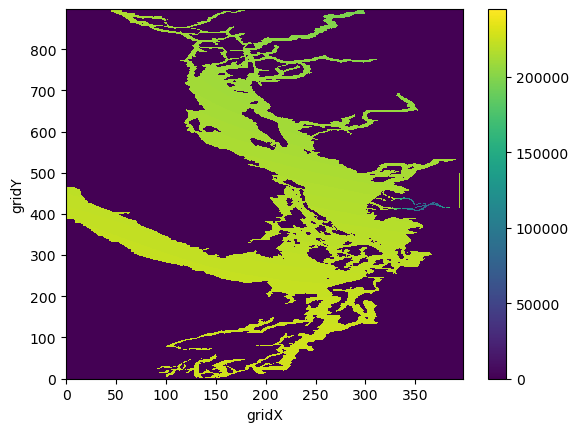

In [79]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
area.plot()
tmask = tmask.rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
mmask = 1 - tmask

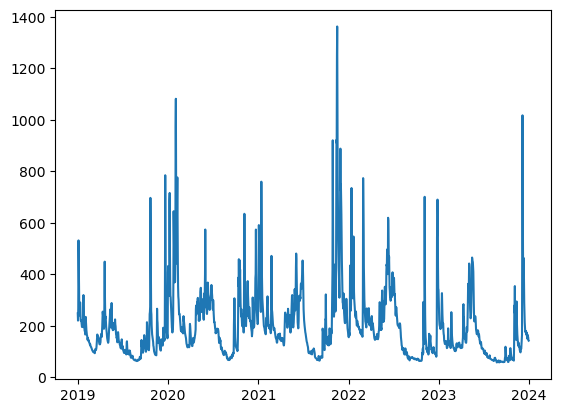

In [4]:
river_dict = {'fraser_river': 'Fraser [m^3/s]', 'nooksack_river': 'Nooksack [m^3/s]', 'skagit_river': 'Skagit1 [m^3/s]', 'snohomish_river': 'SnohomishAllenQuilceda [m^3/s]', \
              'nisqually_river': 'NisquallyMcAllister [m^3/s]', 'elwha_river': 'Elwha [m^3/s]', 'cowichan_river': 'Cowichan1 [m^3/s]', \
              'nanaimo_river': 'Nanaimo1 [m^3/s]', 'puntledge_river': 'Puntledge [m^3/s]', 'salmon_river': 'SalmonSayward [m^3/s]', 'homathko_river': 'Homathko [m^3/s]', \
              'squamish_river': 'Squamish [m^3/s]'}

river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_vol_ts_all12_20190101_20231231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108['month'] = river_flows_202108['date'].dt.month
river_flows_202108['dayofyear'] = river_flows_202108['date'].dt.dayofyear
daily_clim_202108 = river_flows_202108.groupby(['dayofyear']).mean(numeric_only=True).reset_index()
# river_flows_202108

# river_flows_202108.loc[:, (river_flows_202108.columns != 'Unnamed: 0') & (river_flows_202108.columns != 'date') & (river_flows_202108.columns != 'month') & (river_flows_202108.columns != 'dayofyear')].plot()
plt.plot(river_flows_202108['date'], river_flows_202108['Skagit1 [m^3/s]'].values)
# plt.plot(daily_clim_202108['dayofyear'], daily_clim_202108['Skagit1 [m^3/s]'].values)

In [5]:
river_flows_202108.loc[:, (river_flows_202108.columns != 'Unnamed: 0') & (river_flows_202108.columns != 'filename') & (river_flows_202108.columns != 'month') & (river_flows_202108.columns != 'dayofyear')]

,date,Fraser [m^3/s],Nooksack [m^3/s],Skagit1 [m^3/s],SnohomishAllenQuilceda [m^3/s],NisquallyMcAllister [m^3/s],Elwha [m^3/s],Cowichan1 [m^3/s],Nanaimo1 [m^3/s],Puntledge [m^3/s],SalmonSayward [m^3/s],Homathko [m^3/s],Squamish [m^3/s]
0,2019-01-01,1450.005402,18.776036,248.193111,350.888096,102.616894,59.034722,46.418713,39.580721,59.078363,110.470741,72.415055,145.426780
1,2019-01-02,1368.052842,14.782970,219.964322,310.979068,91.862182,55.306213,39.561404,33.733569,50.350877,99.677622,73.781377,119.937339
2,2019-01-03,2938.905199,108.456555,268.794719,380.014042,94.854651,784.229678,598.695906,510.501344,761.976608,402.519825,79.018944,127.154238
3,2019-01-04,5951.393752,283.628122,531.385839,751.257619,104.379002,691.016959,482.649123,411.549542,614.280702,674.252452,81.637727,249.688841
4,2019-01-05,2462.155608,65.732951,434.701258,614.567812,99.671819,248.567251,232.621053,198.353386,296.063158,356.807795,81.751587,249.373010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2023-12-27,1512.938438,13.980466,164.715941,232.870536,92.340838,82.013820,94.395144,80.489690,120.139274,299.936695,134.679136,347.299332
1822,2023-12-28,1433.000820,10.718992,158.082916,223.492962,75.968139,82.367245,156.069737,133.078930,198.634211,663.975117,179.381087,499.973591
1823,2023-12-29,1411.926342,9.344611,154.707947,218.721530,74.951314,91.663064,125.272292,106.818291,159.437462,459.320325,167.406073,480.858592
1824,2023-12-30,1413.709048,9.460871,142.904705,202.034455,74.753419,70.863677,83.055131,70.820187,105.706531,383.896363,188.122244,478.400158


In [6]:
sum_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [181]:
meters_sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2019, 2019))
meters_sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2020, 2020))
meters_sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2021, 2021))
meters_sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2022, 2022))
meters_sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2023, 2023))

In [7]:
# meters_2023_mon = sum_2023_mon * (1/area)
# meters_2022_mon = sum_2022_mon * (1/area)
# meters_2021_mon = sum_2021_mon * (1/area)
# meters_2020_mon = sum_2020_mon * (1/area)
# meters_2019_mon = sum_2019_mon * (1/area)

In [8]:
river_keys = list(sum_2019_mon.keys())

In [9]:
pal_IBM7 = ['#1F5AF5', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#97C042']
pal_IBM11 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#711C32', '#97C042', '#8F4691', '#959F06', '#314527']

pal_CBF7 = ['#005AB5', '#DC3220', '#2C3458', '#A507BB', '#E69E42', '#6A8A2F', '#5A2050']

rainbow_bright = ['#D20000', '#FF7C00', '#FFB600', '#6DCA13', '#44C3D0', '#283BD0', '#B62AD4']
# rainbow_muted = ['#7D0404', '#AB5503', '#CC9100', '#396B09', '#277780', '#151E67', '#561265']
rainbow_muted = ['#7D0404', '#AB5503', '#396B09', '#277780', '#151E67', '#561265']

# rainbow5_bright = ['#921313', '#E8AC22', '#478431', '#365AA2', '#9258B8']
# rainbow5_muted = ['#851111', '#BD601B', '#98982A', '#3F6F6A', '#6459AD']

In [10]:
# colors_list = ['#8b4513', '#008000', '#4682b4', '#4b0082', '#ff0000', '#f2be00', '#00ff00', '#00ffff', '#0000ff', '#918504', '#ff1493', '#2f4f4f', '#2f4f4f']
# lines_list = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', (5, (10, 3)), 'dotted']
# lines_list = [(0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 1))]
markers_list = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '*', '+', '|', '_', 'd']

year_markers = ['o', 's', '^', 'D', 'x']
year_lines = ['-', (0, (1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]

# jet_list = mpl.colormaps['jet'](np.linspace(0, 1, 11))
# black_rgb = np.array([[0, 0, 0, 1]])
# colors_list2 = np.concatenate([jet_list, black_rgb, black_rgb])

# colormap = 'gnuplot'
# colors_list3 = np.concatenate([mpl.colormaps[colormap](np.linspace(0, 1, 7)), mpl.colormaps[colormap](np.linspace(0, 1, 7))])
# lines_list3 = ['-', '-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), ]

# colors_list4 = np.concatenate([plt.cm.tab10(np.arange(6) % 10), plt.cm.tab10(np.arange(7) % 10)])
# lines_list4 = ['-', '-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1))]

# colors_list5 = pal_IBM7[:-1] + pal_IBM7
# lines_list5 = ['-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), '-']

# colors_list6 = pal_CBF7[:-1] + pal_CBF7
# lines_list6 = ['-', '-', '-', '-', '-', '-', (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)), '-']

# # colors_list7 = ['#fee327', '#fdca54', '#f6a570', '#f1969b', '#f08ab1', '#c78dbd', '#927db6', '#5da0d7', '#00b3e1', '#50bcbf', '#65bda5', '#87bf54', '#000000']
# colors_list7 = ['#fee327', '#fdca54', '#f6a570', '#f1969b', '#f08ab1', '#c78dbd', '#927db6', '#5da0d7', '#00b3e1', '#50bcbf', '#65bda5', '#87bf54', '#000000']
# lines_list7 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

colors_list8 = rainbow_bright + rainbow_muted
lines_list8 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

## Functions

In [11]:
# def make_1d_sum(ds, reg_list):
#     all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
#     for region in reg_list[1:]:
#         next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
#         all_1d = all_1d + next

#     return all_1d

In [102]:
# def make_1d_mean(ds, reg_list):
#     all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
#     for region in reg_list[1:]:
#         next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
#         all_1d = all_1d + next

#     return all_1d

In [12]:
# def make_meters(ds, reg_list):
#     all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).mean(dim='gridY').mean('gridX')
#     for region in reg_list[1:]:
#         next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).mean(dim='gridY').mean('gridX')
#         all_1d = all_1d + next

#     return all_1d

In [13]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [170]:
def make_selected_meter(region_list, ds):
    mask_zeros = np.zeros(tmask[0].shape)
    for region in region_list:
        mask_zeros[region[0]:region[1], region[2]:region[3]] = 1
    region_mask = (mask_zeros == 1)
    mmask_bool = (mmask[0] == 1)
    region_tmask_0 = (mmask_bool & region_mask)
    selected_m_sum = ds.where(region_tmask_0, np.nan)
    return selected_m_sum

In [199]:
def plot_river_years(riv_key):  # plots all years on top of each other to look at inter-annual comparisons
    fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    fig.suptitle(riv_key)

    ax[0].plot(sel_m_mean_2019_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
    ax[0].plot(sel_m_mean_2020_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
    ax[0].plot(sel_m_mean_2021_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
    ax[0].plot(sel_m_mean_2022_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
    ax[0].plot(sel_m_mean_2023_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
    ax[0].legend()
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[1].plot(sel_prop_2019_mon['time'].dt.strftime('%m-%d'), sel_prop_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
    ax[1].plot(sel_prop_2020_mon['time'].dt.strftime('%m-%d'), sel_prop_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
    ax[1].plot(sel_prop_2021_mon['time'].dt.strftime('%m-%d'), sel_prop_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
    ax[1].plot(sel_prop_2022_mon['time'].dt.strftime('%m-%d'), sel_prop_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
    ax[1].plot(sel_prop_2023_mon['time'].dt.strftime('%m-%d'), sel_prop_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

In [198]:
def plot_river_years_old(riv_key):  # plots all years on top of each other to look at inter-annual comparisons
    fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    fig.suptitle(riv_key)

    ax[0].plot(meters1_2019_mon['time'].dt.strftime('%m-%d'), meters1_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2020_mon['time'].dt.strftime('%m-%d'), meters1_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2021_mon['time'].dt.strftime('%m-%d'), meters1_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2022_mon['time'].dt.strftime('%m-%d'), meters1_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2023_mon['time'].dt.strftime('%m-%d'), meters1_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
    ax[0].legend()
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[1].plot(prop_2019_mon['time'].dt.strftime('%m-%d'), prop_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2020_mon['time'].dt.strftime('%m-%d'), prop_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2021_mon['time'].dt.strftime('%m-%d'), prop_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2022_mon['time'].dt.strftime('%m-%d'), prop_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2023_mon['time'].dt.strftime('%m-%d'), prop_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

## Regions

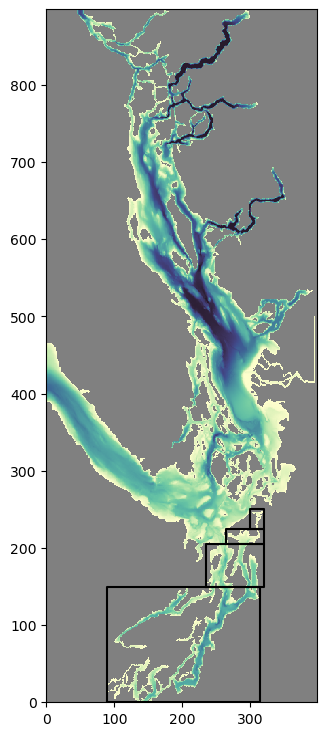

In [15]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, 'k')
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, 'k')
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, 'k')
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, 'k')

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]

Puget Sound is a biologically important region of the Salish Sea with unique characteristics ___. Seperated from the Fraser River Plume by the Haro Mixing Region, and with a high ratio of coastline to water, PS is influenced by the Fraser but potentially not dominated by it. There are three main categories of rivers so talk about with regards to PS: rivers inside PS, rivers with mouths in the strait of Juan de Fuca, and rivers with mouths north of the Haro mixing region. Of those northern rivers, the Fraser river is by far the largest and therefore has the potential to impact the flow of other rivers into puget sound.

## Monthly

In [187]:
selected_m_2019_mon = make_selected_meter(PS_all, meters_sum_2019_mon)
selected_m_2020_mon = make_selected_meter(PS_all, meters_sum_2020_mon)
selected_m_2021_mon = make_selected_meter(PS_all, meters_sum_2021_mon)
selected_m_2022_mon = make_selected_meter(PS_all, meters_sum_2022_mon)
selected_m_2023_mon = make_selected_meter(PS_all, meters_sum_2023_mon)
selected_m_all_mon = xr.concat([selected_m_2019_mon, selected_m_2020_mon, selected_m_2021_mon, selected_m_2022_mon, selected_m_2023_mon], dim='time')
selected_m_all_mon

<xarray.Dataset>
Dimensions:          (time: 60, gridY: 898, gridX: 398)
Coordinates:
  * gridY            (gridY) int64 0 1 2 3 4 5 6 ... 891 892 893 894 895 896 897
  * gridX            (gridX) int64 0 1 2 3 4 5 6 ... 391 392 393 394 395 396 397
  * time             (time) datetime64[ns] 2019-01-15T12:00:00 ... 2023-12-15...
Data variables: (12/13)
    nooksack_river   (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    skagit_river     (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    snohomish_river  (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    nisqually_river  (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    elwha_river      (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    cowichan_river   (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    ...               ...
    puntledge_river  (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    salmon_river     (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    homathko_river   (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    squamish_river   (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    fraser_river     (time, gridY, gridX) float64 nan nan nan ... nan nan nan
    other_rivers     (time, gridY, gridX) float64 nan nan nan ... nan nan nan

In [188]:
sel_m_mean_2019_mon = selected_m_2019_mon.mean(dim='gridY').mean(dim='gridX')
sel_m_mean_2020_mon = selected_m_2020_mon.mean(dim='gridY').mean(dim='gridX')
sel_m_mean_2021_mon = selected_m_2021_mon.mean(dim='gridY').mean(dim='gridX')
sel_m_mean_2022_mon = selected_m_2022_mon.mean(dim='gridY').mean(dim='gridX')
sel_m_mean_2023_mon = selected_m_2023_mon.mean(dim='gridY').mean(dim='gridX')
sel_m_mean_all_mon = xr.concat([sel_m_mean_2019_mon, sel_m_mean_2020_mon, sel_m_mean_2021_mon, sel_m_mean_2022_mon, sel_m_mean_2023_mon], dim='time')
sel_m_mean_all_mon

<xarray.Dataset>
Dimensions:          (time: 60)
Coordinates:
  * time             (time) datetime64[ns] 2019-01-15T12:00:00 ... 2023-12-15...
Data variables: (12/13)
    nooksack_river   (time) float64 0.009994 0.01093 0.0118 ... 0.008436 0.00873
    skagit_river     (time) float64 0.5494 0.5378 0.5162 ... 0.3696 0.4564
    snohomish_river  (time) float64 0.9622 0.9873 0.9397 ... 0.6598 0.7473
    nisqually_river  (time) float64 0.4706 0.5036 0.494 ... 0.3976 0.3901 0.4617
    elwha_river      (time) float64 0.03413 0.03756 0.03716 ... 0.01618 0.01916
    cowichan_river   (time) float64 0.01081 0.01269 0.01425 ... 0.00823 0.008553
    ...               ...
    puntledge_river  (time) float64 0.01605 0.01577 0.01591 ... 0.01436 0.01402
    salmon_river     (time) float64 0.005812 0.005718 ... 0.004704 0.004653
    homathko_river   (time) float64 0.1275 0.1271 0.1243 ... 0.1259 0.1303
    squamish_river   (time) float64 0.154 0.1507 0.1449 ... 0.1543 0.1581 0.1596
    fraser_river     (time) float64 1.351 1.317 1.267 ... 1.405 1.373 1.333
    other_rivers     (time) float64 3.407 3.561 3.462 3.547 ... 2.763 2.767 3.19

In [189]:
tot_sel_2019_mon = sel_m_mean_2019_mon.to_array().sum(dim="variable")
tot_sel_2020_mon = sel_m_mean_2020_mon.to_array().sum(dim="variable")
tot_sel_2021_mon = sel_m_mean_2021_mon.to_array().sum(dim="variable")
tot_sel_2022_mon = sel_m_mean_2022_mon.to_array().sum(dim="variable")
tot_sel_2023_mon = sel_m_mean_2023_mon.to_array().sum(dim="variable")
tot_sel_all_mon = xr.concat([tot_sel_2019_mon, tot_sel_2020_mon, tot_sel_2021_mon, tot_sel_2022_mon, tot_sel_2023_mon], dim='time')
tot_sel_all_mon

<xarray.DataArray (time: 60)>
array([7.10872643, 7.27808999, 7.04409178, 7.13747971, 7.44898986,
       7.2732357 , 6.89087828, 6.57257827, 6.21620391, 6.10576437,
       6.1597647 , 6.15524702, 7.01237688, 8.78059279, 8.21511197,
       7.65972725, 7.81519968, 8.18559697, 8.07964514, 7.73638208,
       7.23623739, 7.07336898, 7.48059159, 7.59451481, 8.35251134,
       8.5083153 , 8.35011219, 8.06982454, 7.99176816, 8.03721805,
       8.12441987, 7.63429089, 7.01930032, 6.58827894, 7.37497915,
       8.32419163, 8.82933294, 8.90775266, 8.75030497, 8.48175683,
       8.35493426, 8.84159959, 8.83038813, 8.33318102, 7.68757352,
       7.0954836 , 6.89060777, 6.72721689, 7.20252586, 7.25678397,
       7.06771941, 6.95275801, 7.61007737, 7.73704287, 7.25489092,
       6.74686798, 6.2786649 , 5.87527984, 5.90425305, 6.54192883])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-15T12:00:00 ... 2023-12-15T12:00:00

In [191]:
sel_prop_2019_mon = sel_m_mean_2019_mon / tot_sel_2019_mon  # prop is the dim1 volume of fw divided by all freshwater, for each river, giving pct contribution of freshwater! 1d in time for each river
sel_prop_2020_mon = sel_m_mean_2020_mon / tot_sel_2020_mon
sel_prop_2021_mon = sel_m_mean_2021_mon / tot_sel_2021_mon
sel_prop_2022_mon = sel_m_mean_2022_mon / tot_sel_2022_mon
sel_prop_2023_mon = sel_m_mean_2023_mon / tot_sel_2023_mon
sel_prop_all_mon = xr.concat([sel_prop_2019_mon, sel_prop_2020_mon, sel_prop_2021_mon, sel_prop_2022_mon, sel_prop_2023_mon], dim='time')
sel_prop_all_mon

<xarray.Dataset>
Dimensions:          (time: 60)
Coordinates:
  * time             (time) datetime64[ns] 2019-01-15T12:00:00 ... 2023-12-15...
Data variables: (12/13)
    nooksack_river   (time) float64 0.001406 0.001502 ... 0.001429 0.001334
    skagit_river     (time) float64 0.07729 0.0739 0.07328 ... 0.06259 0.06976
    snohomish_river  (time) float64 0.1354 0.1356 0.1334 ... 0.1118 0.1142
    nisqually_river  (time) float64 0.0662 0.0692 0.07013 ... 0.06606 0.07057
    elwha_river      (time) float64 0.004801 0.005161 ... 0.002741 0.002929
    cowichan_river   (time) float64 0.001521 0.001743 ... 0.001394 0.001307
    ...               ...
    puntledge_river  (time) float64 0.002258 0.002166 ... 0.002432 0.002144
    salmon_river     (time) float64 0.0008176 0.0007857 ... 0.0007967 0.0007113
    homathko_river   (time) float64 0.01794 0.01747 0.01765 ... 0.02133 0.01992
    squamish_river   (time) float64 0.02166 0.0207 0.02056 ... 0.02677 0.02439
    fraser_river     (time) float64 0.1901 0.1809 0.1799 ... 0.2326 0.2037
    other_rivers     (time) float64 0.4792 0.4893 0.4914 ... 0.4686 0.4876

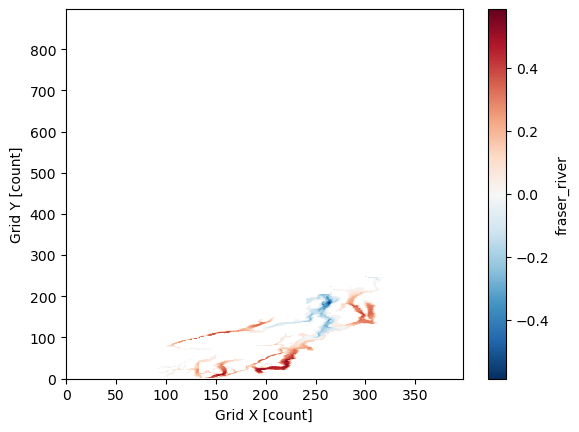

In [173]:
(selected_m_2019_mon['fraser_river'][10] - selected_m_2019_mon['fraser_river'][6]).plot()

In [17]:
# dim1_2019_mon = make_1d(sum_2019_mon, PS_all)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
# dim1_2020_mon = make_1d(sum_2020_mon, PS_all)
# dim1_2021_mon = make_1d(sum_2021_mon, PS_all)
# dim1_2022_mon = make_1d(sum_2022_mon, PS_all)
# dim1_2023_mon = make_1d(sum_2023_mon, PS_all)
# dim1_all_mon = xr.concat([dim1_2019_mon, dim1_2020_mon, dim1_2021_mon, dim1_2022_mon, dim1_2023_mon], dim='time')

In [18]:
# meters1_2019_mon = dim1_2019_mon/total_area  # meters1 is the sum of all the water in the region divided by the total area of the regions. is 1d in time for each river
# meters1_2020_mon = dim1_2020_mon/total_area
# meters1_2021_mon = dim1_2021_mon/total_area
# meters1_2022_mon = dim1_2022_mon/total_area
# meters1_2023_mon = dim1_2023_mon/total_area
# meters1_all_mon = xr.concat([meters1_2019_mon, meters1_2020_mon, meters1_2021_mon, meters1_2022_mon, meters1_2023_mon], dim='time')

In [19]:
# totals_2019_mon = dim1_2019_mon.to_array().sum(dim="variable")  # totals is the sum of all freshwater in the region from all the rivers. 1d in time and not sep by river
# totals_2020_mon = dim1_2020_mon.to_array().sum(dim="variable")
# totals_2021_mon = dim1_2021_mon.to_array().sum(dim="variable")
# totals_2022_mon = dim1_2022_mon.to_array().sum(dim="variable")
# totals_2023_mon = dim1_2023_mon.to_array().sum(dim="variable")
# totals_all_mon = xr.concat([totals_2019_mon, totals_2020_mon, totals_2021_mon, totals_2022_mon, totals_2023_mon], dim='time')

In [20]:
# prop_2019_mon = dim1_2019_mon/totals_2019_mon  # prop is the dim1 volume of fw divided by all freshwater, for each river, giving pct contribution of freshwater! 1d in time for each river
# prop_2020_mon = dim1_2020_mon/totals_2020_mon
# prop_2021_mon = dim1_2021_mon/totals_2021_mon
# prop_2022_mon = dim1_2022_mon/totals_2022_mon
# prop_2023_mon = dim1_2023_mon/totals_2023_mon
# prop_all_mon = xr.concat([prop_2019_mon, prop_2020_mon, prop_2021_mon, prop_2022_mon, prop_2023_mon], dim='time')

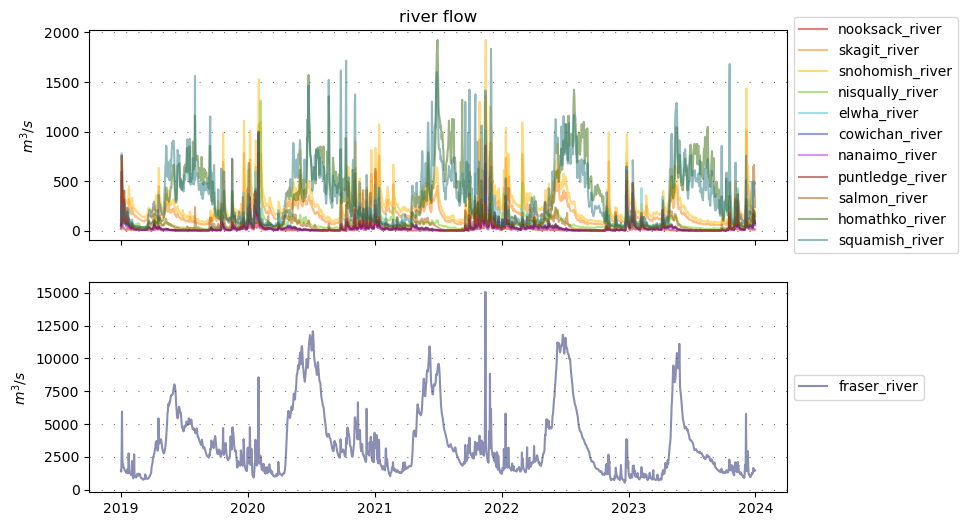

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys[:-2]:
    ax[0].plot(river_flows_202108['date'], river_flows_202108[river_dict[key]].values, label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, alpha=0.5)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax[0].set_title('river flow')
    ax[0].set_ylabel(r'$m^3/s$')
    i += 1

ax[1].plot(river_flows_202108['date'], river_flows_202108[river_dict['fraser_river']].values, label='fraser_river', color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, alpha=0.5)
ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax[1].set_ylabel(r'$m^3/s$')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.plot(river_flows_202108['date'], river_flows_202108['Skagit1 [m^3/s]'].values)

Daily flow values for all rivers in the domain are shown in teh figure above. There is a clear seasonality to the flow, with the type of seasonality of the hydrograph falling under one of the following classifications: rainfall, snowmelt, glacial, or mixed. The hydrograph classification is linked to not only the timing of peak flow, but also to the variability of the flow on a day to day basis. In this 5 year sample set from 2019 to 2024, it's apparent that there have been historic year to year variations as well. In the Fraser River for example, the peak flow in 2019 is much lower than in any of the other years. In 2023, the oeak of the flow is still similar to other years, but the peak drops off very quickly in comparison to the rest of the years.

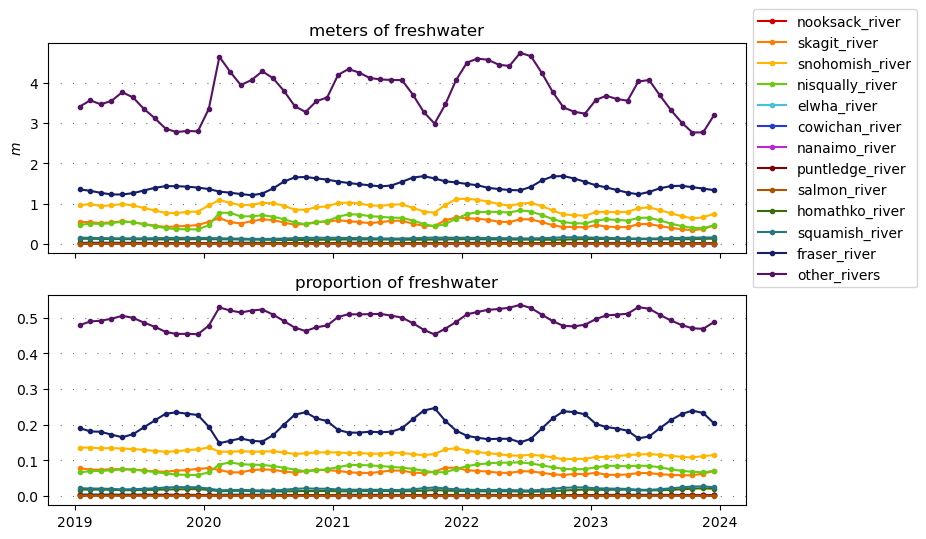

In [194]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys:
    ax[0].plot(sel_m_mean_all_mon['time'], sel_m_mean_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, marker='o', markersize=3)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')

    # ax[1].plot(dim1_all_mon['time'], dim1_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
    # ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    # ax[1].set_title('volume')
    # ax[1].set_ylabel(r'$m^3$')

    ax[1].plot(sel_prop_all_mon['time'], sel_prop_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, marker='o', markersize=3)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    i += 1

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, '$m$')

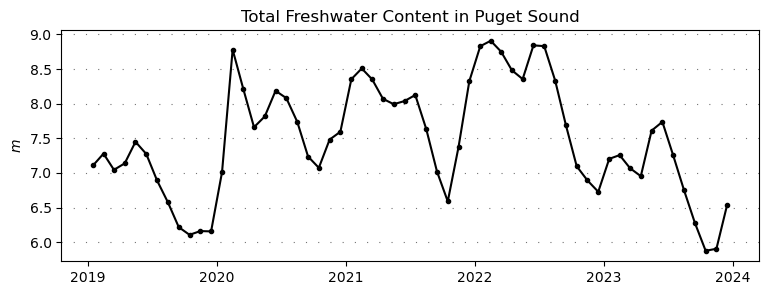

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True)

total_meters_all_mon = sel_m_mean_all_mon.to_array().sum(dim="variable")
ax.plot(total_meters_all_mon['time'], total_meters_all_mon, color='black', linewidth=1.5, marker='o', markersize=3)
ax.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax.set_title('Total Freshwater Content in Puget Sound')
ax.set_ylabel(r'$m$')

Notice the double peaks here. Guessing the first is from local rivers and the second is from outside or Fraser, but should look into it more

In [31]:
# fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# i = 0
# key = river_keys[0]
# ax[0].fill_between(meters1_all_mon['time'], meters1_all_mon[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
# ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
# ax[0].set_title('meters of freshwater')
# ax[0].set_ylabel(r'$m$')

# hold_prop = prop_all_mon[key]
# ax[1].fill_between(prop_all_mon['time'], hold_prop, label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
# ax[1].set_title('proportion of freshwater')
# ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

# i = 1
# for key in river_keys[1:]:
#     ax[0].fill_between(meters1_all_mon['time'], meters1_all_mon[river_keys[i]], meters1_all_mon[river_keys[i-1]], label=river_keys[i], color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
#     ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
#     ax[0].set_title('meters of freshwater')
#     ax[0].set_ylabel(r'$m$')

#     ax[1].plot(prop_all_mon['time'], prop_all_mon[river_keys[i]] + hold_prop, label=river_keys[i], color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5)
#     ax[1].set_title('proportion of freshwater')
#     ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

#     hold_prop = hold_prop + prop_all_mon[river_keys[i]]

#     i += 1

# ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Inter-annual meters/prop comparisons

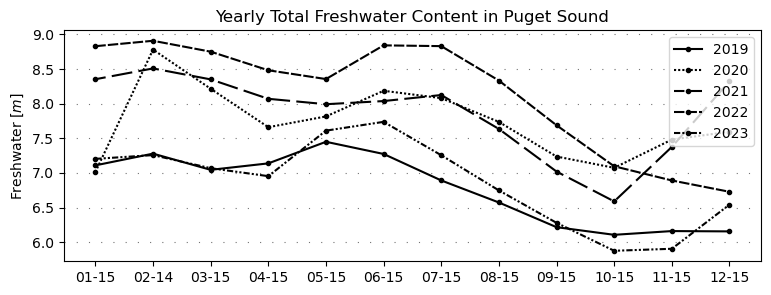

In [196]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True)
ax.plot(sel_m_mean_2019_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2019_mon.to_array().sum(dim="variable"), label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
ax.plot(sel_m_mean_2020_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2020_mon.to_array().sum(dim="variable"), label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
ax.plot(sel_m_mean_2021_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2021_mon.to_array().sum(dim="variable"), label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
ax.plot(sel_m_mean_2022_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2022_mon.to_array().sum(dim="variable"), label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
ax.plot(sel_m_mean_2023_mon['time'].dt.strftime('%m-%d'), sel_m_mean_2023_mon.to_array().sum(dim="variable"), label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
ax.legend()
ax.set_title('Yearly Total Freshwater Content in Puget Sound')
ax.set_ylabel(r'Freshwater [$m$]')
ax.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

Notice how the second peak is shifted in 2019/2023 vs the other years! Look into that. Also notice the huge spike in February 2020 - this was likely one of the large atsmospheric events. There may be a chart of accumulated rainfall on Roland's site

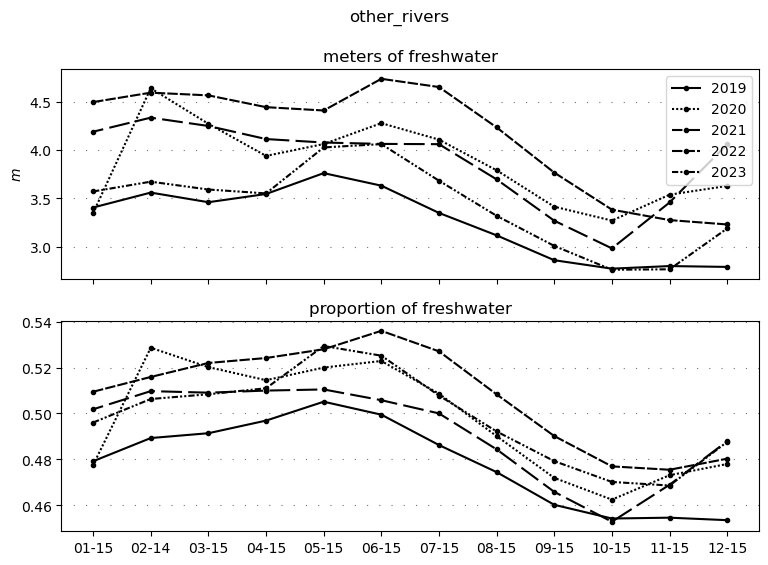

In [200]:
plot_river_years('other_rivers')

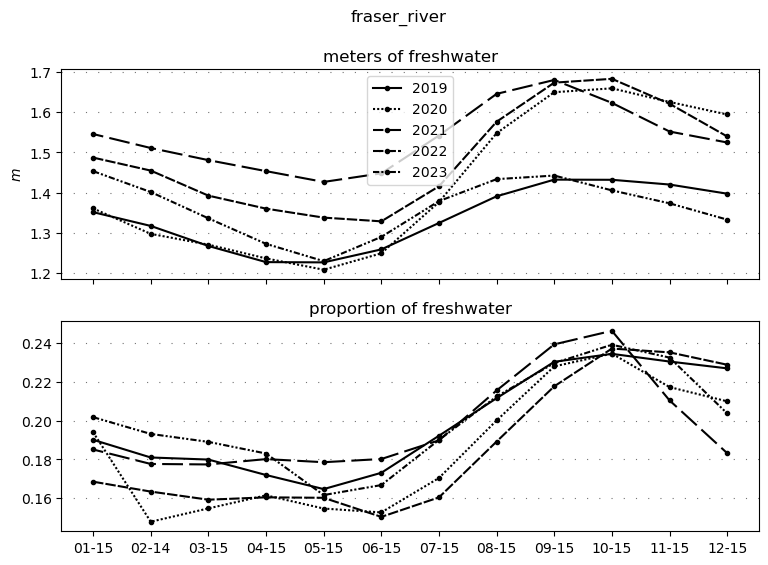

In [201]:
plot_river_years('fraser_river')  # interesting here: look at 2019 and 2023 where there are fewer meters of fw, but the proportion is the same

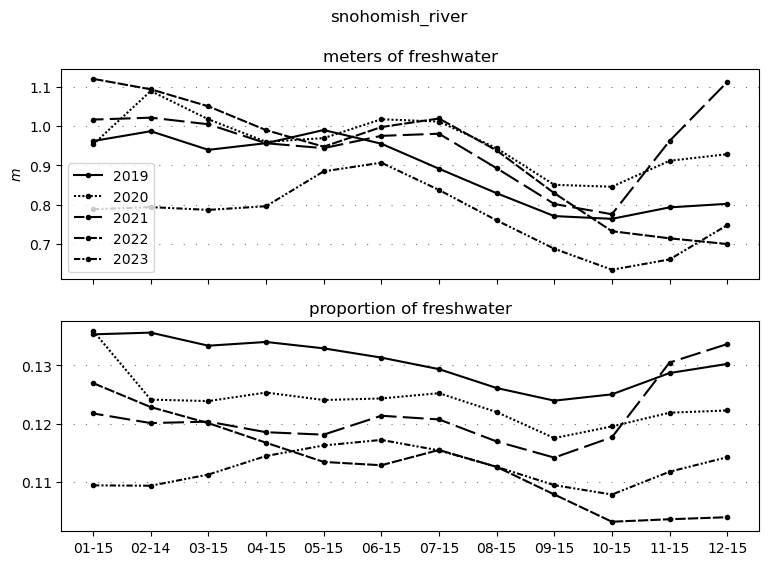

In [202]:
plot_river_years('snohomish_river')

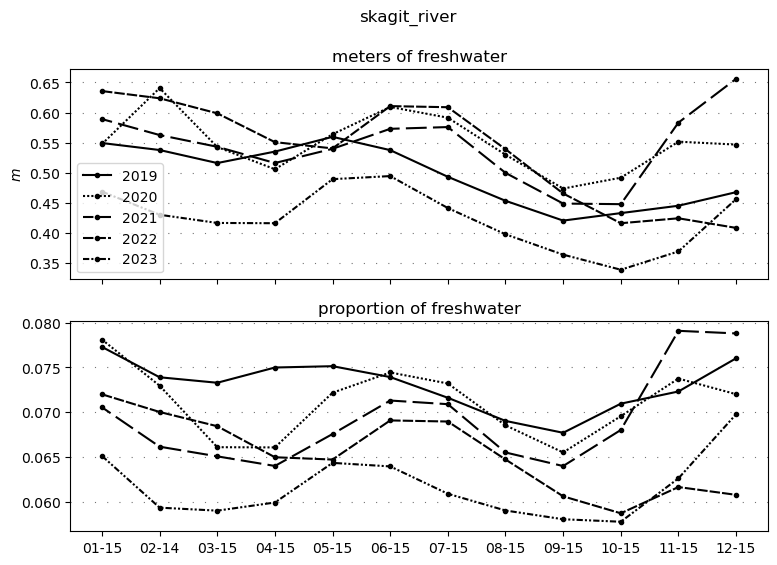

In [203]:
plot_river_years('skagit_river')

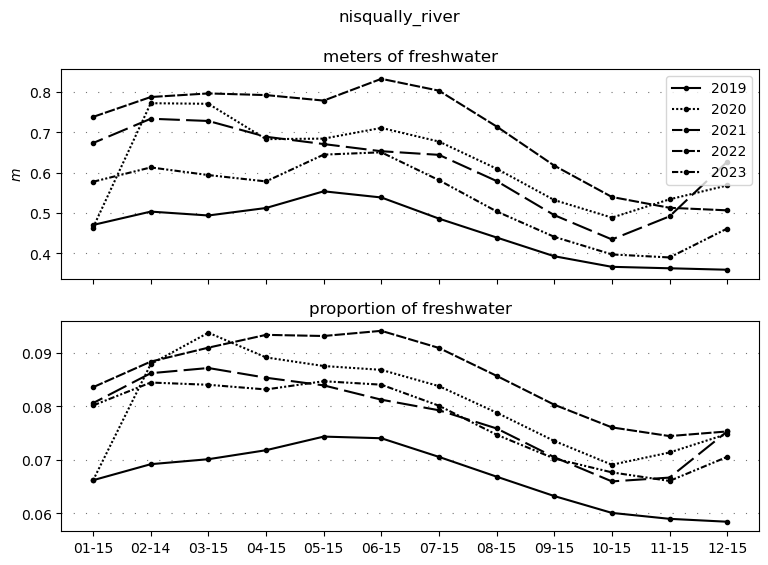

In [204]:
plot_river_years('nisqually_river')

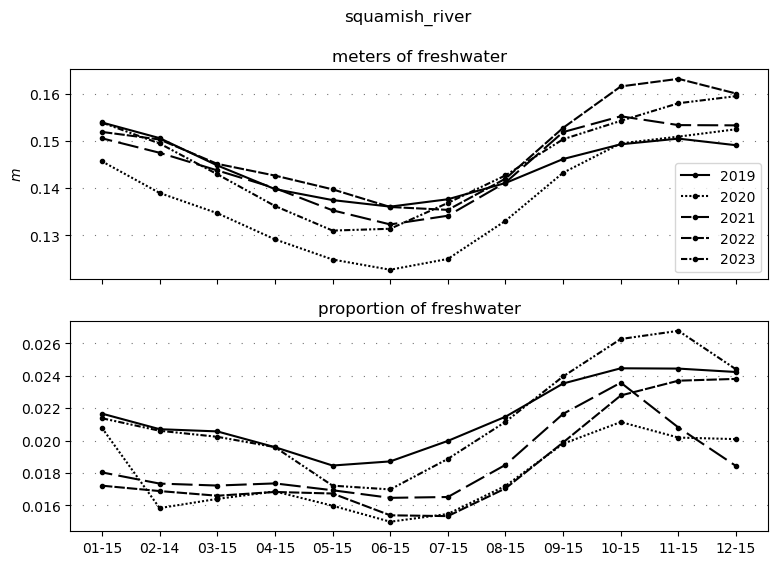

In [205]:
plot_river_years('squamish_river')

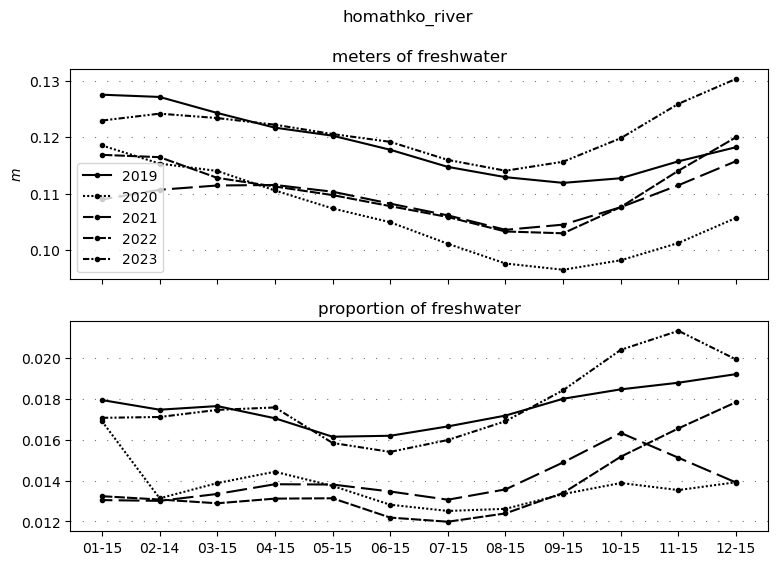

In [206]:
plot_river_years('homathko_river')  # interesting here that the homathko signal is much stronger in 2019 and 2023 both in prop and volume

## Daily

In [207]:
# dim1_2019 = make_1d(sum_2019, PS_all)

In [208]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# for key in river_keys:
#     dim1_2019[key].plot(label=key)

# ax.legend()